In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.manifold import TSNE
#import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
sns.set_theme()

In [8]:
df = pd.read_csv("n0_metadata19_hmineq0.0_tmin20050000_mean_grid_20.csv") 
df = df.dropna()
# Drop the specified feature
df = df.drop(columns=['RGIId'])

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

<function matplotlib.pyplot.show(close=None, block=None)>

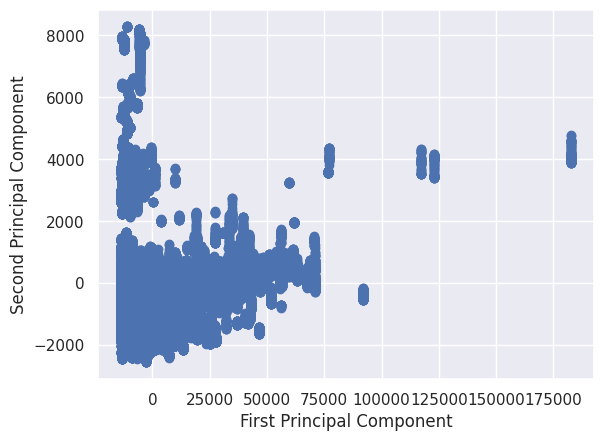

In [10]:
plt.figure()
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
#plt.title("PCA visualization of Custom Classification dataset")
plt.show

In [11]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(df)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

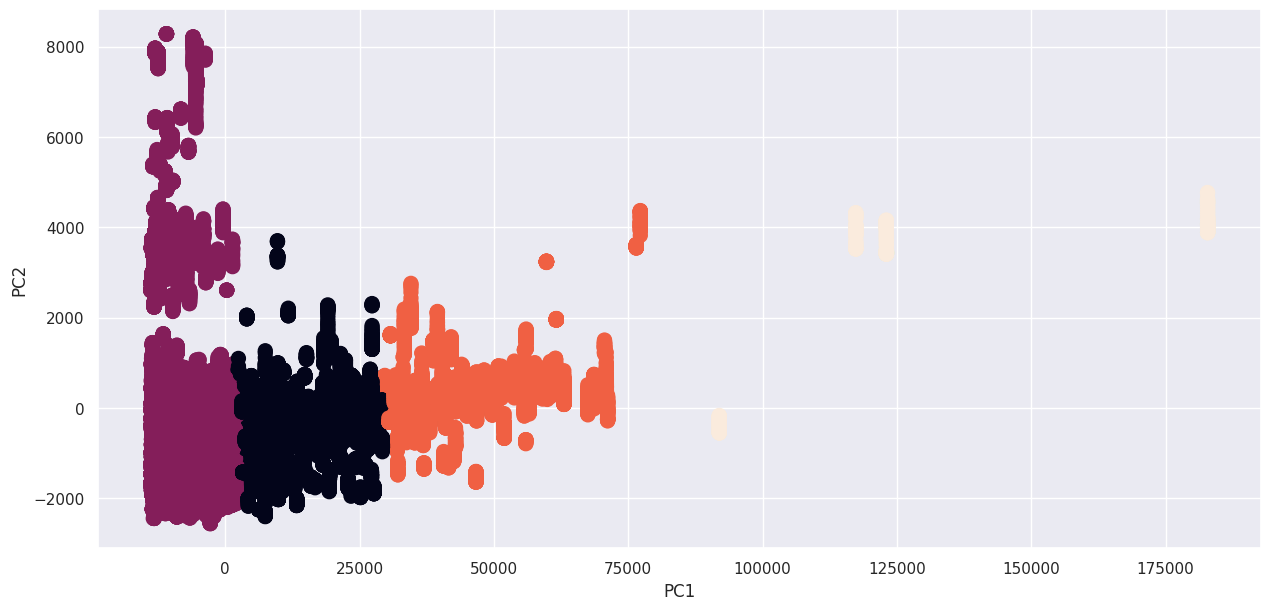

In [12]:
plt.figure(1, figsize=(15, 7))
plt.clf()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1, s=100)
#plt.scatter(centroids1[:, 0], centroids1[:, 1], s=300, c='red', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Scatter plot of PCA components')
plt.show()

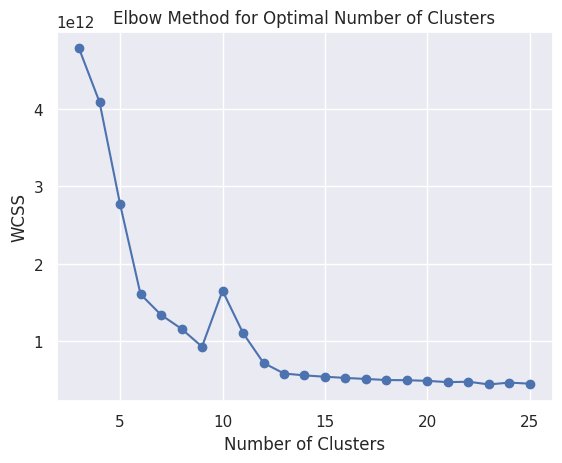

In [16]:
# Initialize an empty list to store the WCSS values
wcss_values = []

# Define the range of possible values for the number of clusters
cluster_range = range(3, 26)

# Iterate over the range of possible values for the number of clusters
for num_clusters in cluster_range:
    # Apply KMeans clustering with the specified number of clusters
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df)
    
    # Compute the within-cluster sum of squares (WCSS)
    wcss = kmeans.inertia_
    
    # Append the WCSS value to the list
    wcss_values.append(wcss)

# Plot the WCSS values as a function of the number of clusters
plt.plot(cluster_range, wcss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

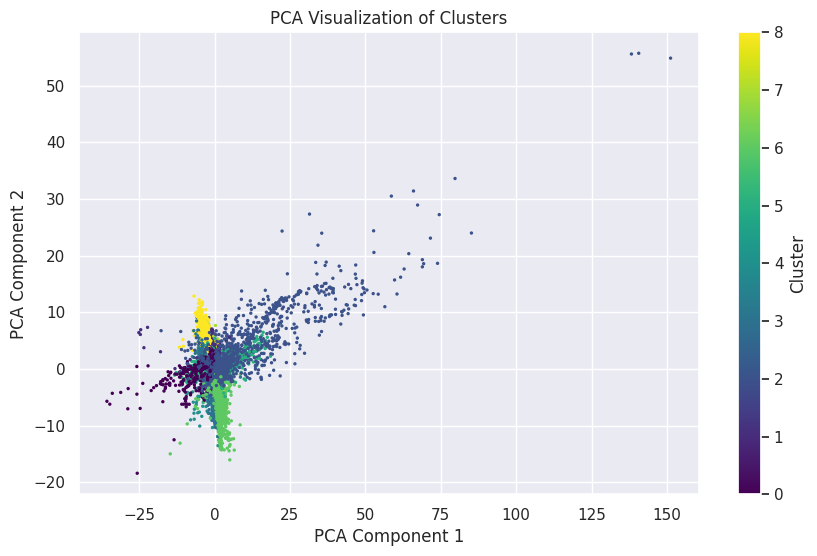

In [15]:
# Step 1: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Clustering with MiniBatchKMeans
n_clusters = 9  # Set the number of clusters
mbk = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=1000)
clusters = mbk.fit_predict(X_scaled)

# Step 3: Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Optionally, you can visualize the clusters if you reduce the dimensions
# For visualization purposes only (using PCA or t-SNE)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=2)
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()